# Linear Regression

Step 1, import the things we probably always want

In [5514]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

These ones are not for always, but I like this plotting style for this workbook

In [5515]:
import matplotlib
matplotlib.style.use('ggplot')

Let's take this set

X has values 5,7,9,11,13,15

y has 11,14,20,24,29,31

and we want to build a model
$\hat{y} = w_0 + w_1x$

In [5516]:
X = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])

Let's plot it to see if a linear model makes sense for this

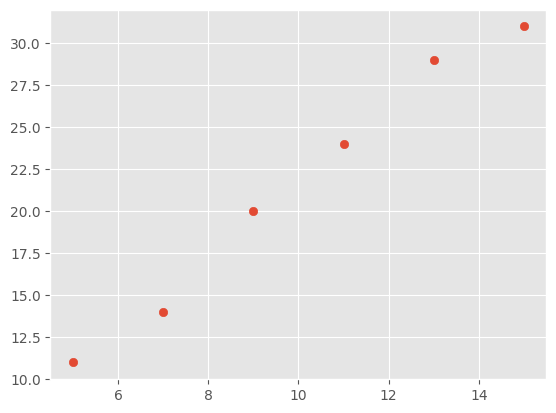

In [5517]:
plt.scatter(X,y)
plt.show()

We can check the correlation coefficient 

In [5518]:
np.corrcoef(X, y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

0.99322, very high correlation!

## Data Structure: let's look at X and y in more detail

In [5519]:
y.shape

(6,)

In [5520]:
y.ndim

1

y is clearly a 1d array, as expected - good

In [5521]:
X.shape

(6,)

In [5522]:
X.ndim

1

X is also a 1d array, not good. It needs to be a 2d array

In [5523]:
X

array([ 5,  7,  9, 11, 13, 15])

It's written as one row, but really we need 6 rows with one entry in each row. Let's reshape the array

In [5524]:
X = X.reshape(-1,1)

In [5525]:
X.shape

(6, 1)

In [5526]:
X.ndim

2

2d array. Good. Let's look at it

In [5527]:
X

array([[ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15]])

6 rows now

## Section 3, build the model

In [5528]:
from sklearn.linear_model import LinearRegression

In [5529]:
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

Create the model, with sklearn you initialise the model with an "empty constructor" of the base form of the model. LinearRegression is the constructor

In [5530]:
model = LinearRegression()

Now "fit" the model using X and y. Use an appropriate ? after method name to see. .fit expects the X part to be a matrix, but we have a 1 dimensional array. Pay attention to the error message when you just do x,y

In [5531]:
model.fit(X,y)

LinearRegression()

## Section 4 Inferences

In [5532]:
model.coef_

array([2.12857143])

In [5533]:
model.intercept_

0.2142857142857153

There are the parameters

$\hat{y} = 0.2142857142857153 + 2.12857143 x$

is the model

In [5534]:
w0 = model.intercept_
w1 = model.coef_[0]

In [5535]:
predictions = w0 + np.dot(w1,X).reshape(1,-1)

In [5536]:
predictions

array([[10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
        32.14285714]])

Using the built in .predict

In [5537]:
pred = model.predict(X)

In [5538]:
pred

array([10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
       32.14285714])

In [5539]:
pred == predictions

array([[ True,  True,  True,  True,  True,  True]])

They're the same.

## Section 5 Evaluation

In [5540]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.metrics import root_mean_squared_error as rms

I had to comment out rms on my ATU laptop as sklearn is not up to date - it might work for you do so try uncommenting

In [5541]:
mse(y,pred)

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


0.723809523809522

In [5542]:
r2(y,pred)

0.9864918906909576

Very close to 1!

In [5543]:
rms(y,pred)

0.8507699593953244

In [5544]:
rmse = np.sqrt(mse(y,pred))

In [5545]:
rmse

0.8507699593953244

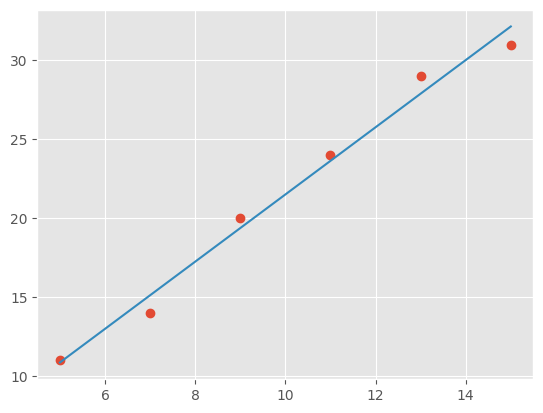

In [5546]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

shows the line of best fit

In [5547]:
model.score(X,y)

0.9864918906909576

Agrees with the r2 from above

## Simple linear regression with automobile data
We will now use sklearn to to predict automobile milesage per gallon (mpg) and evaluate these predictions. We first load the data and split them into a training set and a testing set.

In [5548]:
#load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

>**EXERCISE:**  Pick one variable to use as a predictor for simple linear regression.  Create a markdown cell below and discuss your reasons.  You may want to justify this with some visualizations.  Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors?

## Your code (if any) here
***


## Step 1 Choosing the Variable

### X = cyl and Y = mpg

In [5549]:
# Prepare X and y using cyl as feature and mpg as target
X = dfcars['cyl'].values  # Feature: number of cylinders
y = dfcars['mpg'].values  # Target: miles per gallon


Let's plot it to see if a linear model makes sense for this

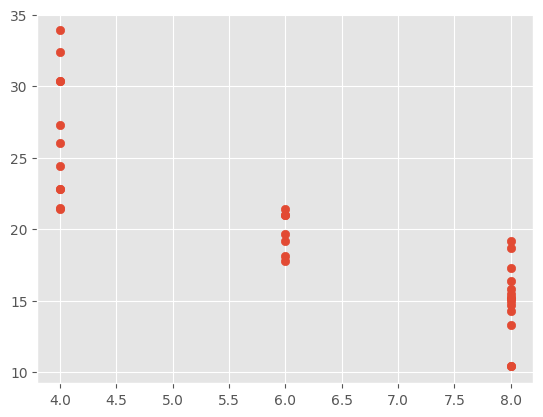

In [5550]:
plt.scatter(X,y)
plt.show()

In [5551]:
np.corrcoef(X, y)

array([[ 1.        , -0.85216196],
       [-0.85216196,  1.        ]])

### X = disp and Y = mpg

In [5552]:
# Prepare X and y using disp as feature and mpg as target
X1 = dfcars['disp'].values  # Feature: disp
y1 = dfcars['mpg'].values  # Target: miles per gallon

Let's plot it to see if a linear model makes sense for this

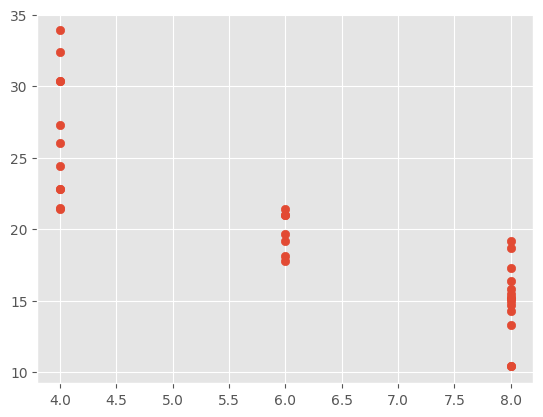

In [5553]:
plt.scatter(X,y)
plt.show()

In [5554]:
np.corrcoef(X, y)

array([[ 1.        , -0.85216196],
       [-0.85216196,  1.        ]])

### X = hp and Y = mpg

In [5555]:
# Prepare X and y using hp as feature and mpg as target
X = dfcars['hp'].values  # Feature: hp
y = dfcars['mpg'].values  # Target: miles per gallon

Let's plot it to see if a linear model makes sense for this

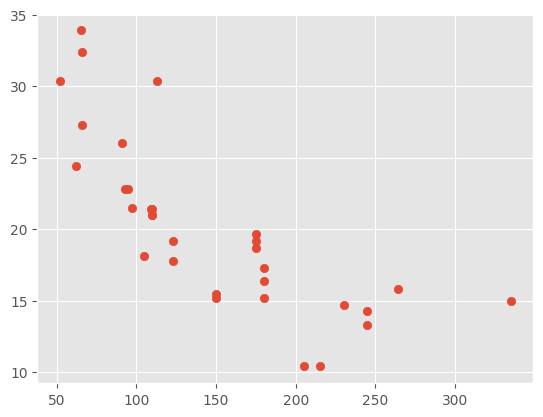

In [5556]:
plt.scatter(X,y)
plt.show()

In [5557]:
np.corrcoef(X, y)

array([[ 1.        , -0.77616837],
       [-0.77616837,  1.        ]])

### X = drat and Y = mpg

In [5558]:
# Prepare X and y using drat as feature and mpg as target
X = dfcars['drat'].values  # Feature: drat
y = dfcars['mpg'].values  # Target: miles per gallon

Let's plot it to see if a linear model makes sense for this

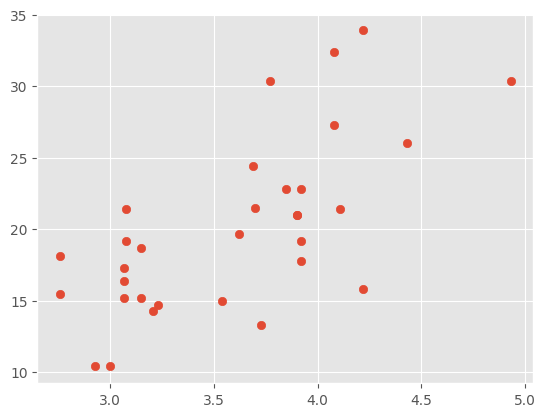

In [5559]:
plt.scatter(X,y)
plt.show()

In [5560]:
np.corrcoef(X, y)

array([[1.        , 0.68117191],
       [0.68117191, 1.        ]])

### X = wt and Y = mpg

In [5561]:
# Prepare X and y using wt as feature and mpg as target
X = dfcars['wt'].values  # Feature: wt
y = dfcars['mpg'].values  # Target: miles per gallon

Let's plot it to see if a linear model makes sense for this

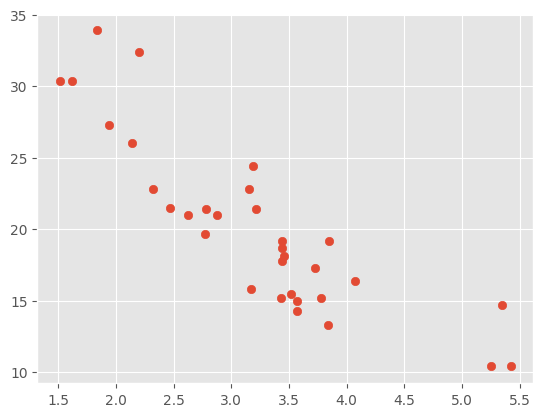

In [5562]:
plt.scatter(X,y)
plt.show()

In [5563]:
np.corrcoef(X, y)

array([[ 1.        , -0.86765938],
       [-0.86765938,  1.        ]])

### X = qsec and Y = mpg

In [5564]:
# Prepare X and y using qsec as feature and mpg as target
X = dfcars['qsec'].values  # Feature: qsec
y = dfcars['mpg'].values  # Target: miles per gallon

Let's plot it to see if a linear model makes sense for this

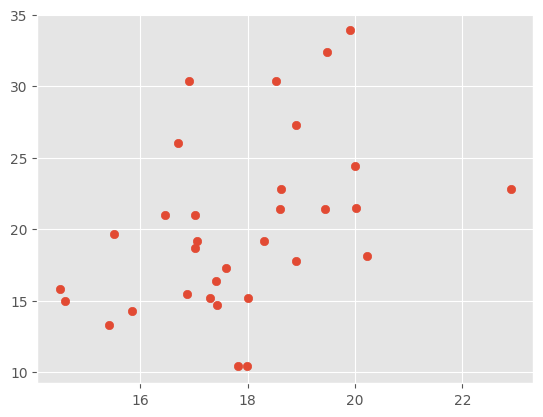

In [5565]:
plt.scatter(X,y)
plt.show()

In [5566]:
np.corrcoef(X, y)

array([[1.        , 0.41868403],
       [0.41868403, 1.        ]])

### X = vs and Y = mpg

In [5567]:
# Prepare X and y using vs as feature and mpg as target
X = dfcars['vs'].values  # Feature: vs
y = dfcars['mpg'].values  # Target: miles per gallon

Let's plot it to see if a linear model makes sense for this

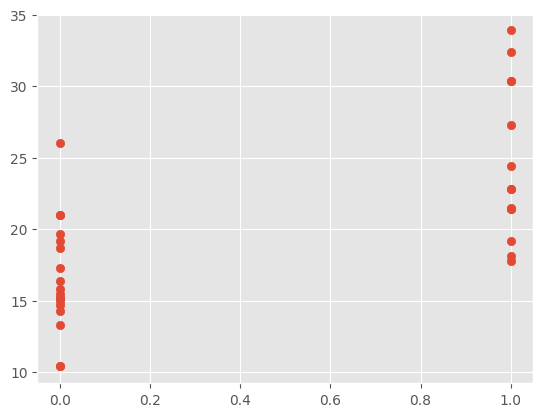

In [5568]:
plt.scatter(X,y)
plt.show()

In [5569]:
np.corrcoef(X, y)

array([[1.        , 0.66403892],
       [0.66403892, 1.        ]])

### X = am and Y = mpg

In [5570]:
# Prepare X and y using am as feature and mpg as target
X = dfcars['am'].values  # Feature: am
y = dfcars['mpg'].values  # Target: miles per gallon

Let's plot it to see if a linear model makes sense for this

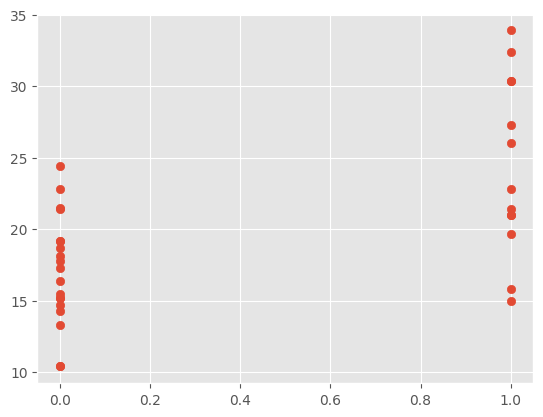

In [5571]:
plt.scatter(X,y)
plt.show()

In [5572]:
np.corrcoef(X, y)

array([[1.        , 0.59983243],
       [0.59983243, 1.        ]])

### X = gear and Y = mpg

In [5573]:
# Prepare X and y using gear as feature and mpg as target
X = dfcars['gear'].values  # Feature: gear
y = dfcars['mpg'].values  # Target: miles per gallon

Let's plot it to see if a linear model makes sense for this

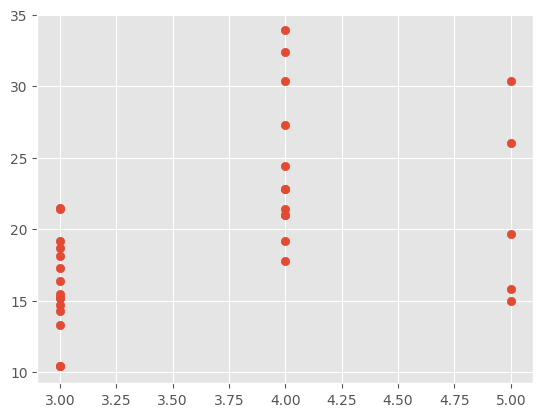

In [5574]:
plt.scatter(X,y)
plt.show()

In [5575]:
np.corrcoef(X, y)

array([[1.        , 0.48028476],
       [0.48028476, 1.        ]])

### X = carb and Y = mpg

In [5576]:
# Prepare X and y using carb as feature and mpg as target
X = dfcars['carb'].values  # Feature: carb
y = dfcars['mpg'].values  # Target: miles per gallon

Let's plot it to see if a linear model makes sense for this

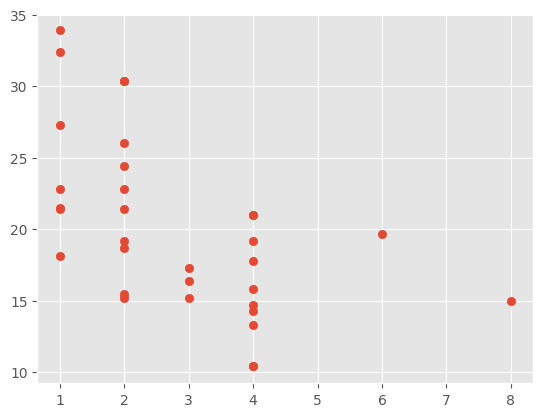

In [5577]:
plt.scatter(X,y)
plt.show()

In [5578]:
np.corrcoef(X, y)

array([[ 1.        , -0.55092507],
       [-0.55092507,  1.        ]])

### Decision

The best variable to use to predict miles per galon is weight (wt) and displacement (disp) and that's because it was observed in the plots that those seem to fit better to a line and have better correlation strength with miles per galon. Where the correlation coeficient between weight and miles per galon is -0.8677 which means that heavier cars generally get worse gas mileage. For the correlation coeficient between displacement and miles per galon, the value of -0.8476 was resulted which means that larger engine displacement typically means lower fuel efficiency.

# For X = wt

## Step 2 Data Structure: let's look at X (weight)

In [5579]:
X = dfcars['wt'].values # Feature: wt

In [5580]:
# Reshape X to 2D array (required by scikit-learn)
X = X.reshape(-1, 1)

### Array

In [5581]:
X.shape

(32, 1)

### Dimension

In [5582]:
X.ndim

2

> **EXERCISE:** With sklearn fit the training data using simple linear regression. 

> Plot the data and the prediction.  

>Print out the mean squared error for the set

In [5583]:
model = LinearRegression()

## Define  predictor and response for set

In [5584]:
model.fit(X,y)

LinearRegression()

### Create linear regression object with sklearn

In [5585]:
model.coef_

array([-5.34447157])

In [5586]:
model.intercept_

37.28512616734204

There are the parameters for weight (X)

$\hat{y} = 37.28512616734204 - 5.34447157 x$

is the model

In [5587]:
w0 = model.intercept_
w1 = model.coef_[0]

## Train the model and make predictions

Using .pred miles per galoon based on X (weight)

In [5588]:
pred = model.predict(X)

In [5589]:
pred

array([23.28261065, 21.9197704 , 24.88595212, 20.10265006, 18.90014396,
       18.79325453, 18.20536265, 20.23626185, 20.45004071, 18.90014396,
       18.90014396, 15.53312687, 17.3502472 , 17.08302362,  9.22665041,
        8.29671236,  8.71892561, 25.52728871, 28.65380458, 27.47802083,
       24.11100374, 18.47258623, 18.92686632, 16.76235533, 16.73563297,
       26.94357367, 25.847957  , 29.19894068, 20.34315128, 22.48093991,
       18.20536265, 22.4274952 ])

## Print out coefficients

In [5590]:
mse(y,pred)

8.697560548229477

In [5591]:
r2(y,pred)

0.7528327936582646

In [5592]:
rms(y,pred)

2.949162685955028

In [5593]:
rmse = np.sqrt(mse(y,pred))

In [5594]:
rmse

2.949162685955028

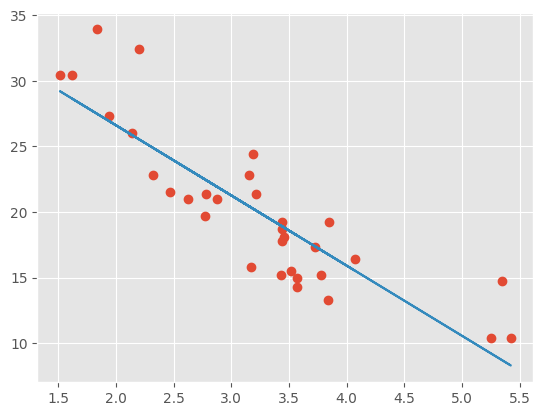

In [5595]:
# your code here
# Plot outputs

plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

shows the line of best fit

In [5596]:
model.score(X,y)

0.7528327936582646

Agrees with the r2 from above

****

## For X = disp

## Step 2 Data Structure: let's look at X (displacement)

In [5597]:
X = dfcars['disp'].values # Feature: disp

In [5598]:
# Reshape X to 2D array (required by scikit-learn)
X = X.reshape(-1, 1)

### Array

In [5599]:
X.shape

(32, 1)

### Dimension

In [5600]:
X.ndim

2

> **EXERCISE:** With sklearn fit the training data using simple linear regression. 

> Plot the data and the prediction.  

>Print out the mean squared error for the set

model = LinearRegression()

## Define  predictor and response for set

In [5601]:
model.fit(X,y)

LinearRegression()

### Create linear regression object with sklearn

In [5602]:
model.coef_

array([-0.04121512])

In [5603]:
model.intercept_

29.599854756163946

There are the parameters for displacement (X1)

$\hat{y} = 29.599854756163946 -0.04121512 x1$

is the model

In [5604]:
w0 = model.intercept_
w1 = model.coef_[0]

## Train the model and make predictions

Using function .predict to predict miles per galoon based on X (displacement)

In [5605]:
pred = model.predict(X)

In [5606]:
pred

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

## Print out coefficients

In [5607]:
mse(y,pred)

9.91120904006827

In [5608]:
r2(y,pred)

0.7183433404897299

In [5609]:
rms(y,pred)

3.1482072740002796

In [5610]:
rmse = np.sqrt(mse(y,pred))

In [5611]:
rmse

3.1482072740002796

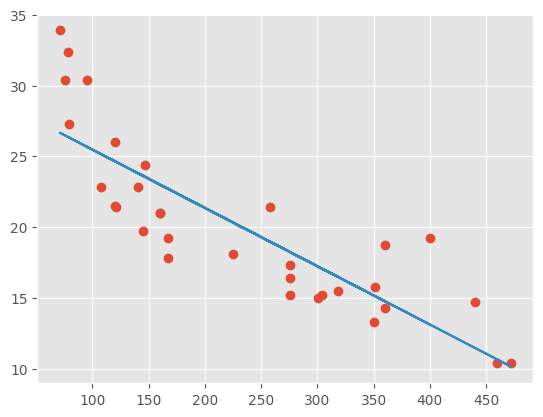

In [5612]:
# your code here
# Plot outputs

plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()


shows the line of best fit

In [5613]:
model.score(X,y)

0.7183433404897299

Agrees with the r2 from above

Let's fit the training data (from the diabetes dataset built into sklearn) using multiple linear regression with multiple predictors. 

# Diabetes Dataset - Multiple linear regression 

Now we are going to fit the training data (from the diabetes dataset built into sklearn) using multiple linear regression with multiple predictors. 

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


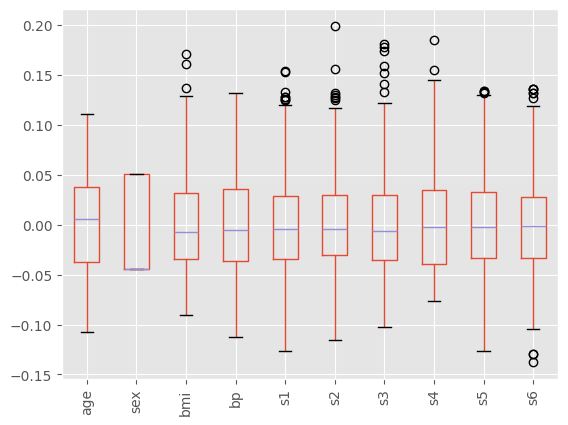

In [ ]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data.boxplot(rot=90)
data.head()

Above I put the data into a pandas dataframe and then tried to visualise it. You will notice all of the data is in a similar range

### Normalised data
They all have a mean of 0 and standard deviation of 1. This is called Normalising the data and is a common step that I'll get into later on.

The obvious one you'll notice is the sex variable. This has two options which are 0.050680 or -0.044642, when usually with 2 options we would go with 0 and 1. The numbers were changed due to this normalisation

In [ ]:
X = data 
y = diabetes.target

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X,y)

LinearRegression()

In [ ]:
r_squared = lr.score(X,y)
r_squared

0.5177484222203499

Let's do a slightly different r2

In [ ]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

0.5065592904853232

In [ ]:
lr.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [ ]:
lr.intercept_

152.13348416289597

Text(0, 0.5, 'Coefficient')

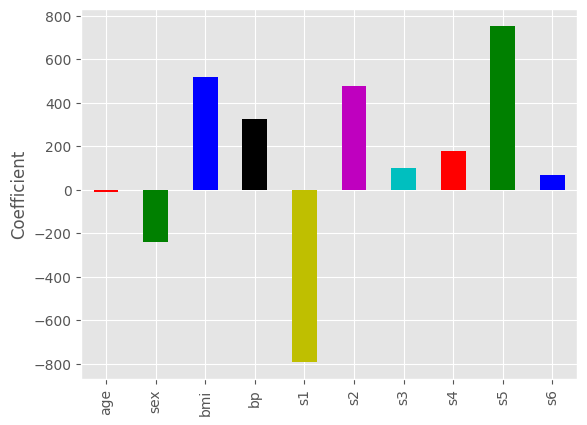

In [ ]:
coef=pd.Series(lr.coef_ , index=diabetes.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

Some of those coefficients are very large, and it looks like age does not contribute as much as the others

The very large coefficients can often be problematic so we'll have to think about this one again later

Maybe removing age will give us a better model

We don't really have enough knowledge to figure it out. It's possible you would get a better model without age, s3, s4 and s6